### Name : Dhwani Hingu | Student No. : x19216742 | Subject : DMML

# What are the factors helpful in analysing whether an employee is looking for a job change or no?

In [141]:

# Importing the required libraries


import numpy as np # linear algebra
import pandas as pd # data processing
import missingno as msno

#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt



from datetime import datetime
from scipy.stats import skew
import time
import copy
import math

from sklearn.feature_selection import SelectKBest,chi2,f_classif,mutual_info_classif  # Feature Engineering
from sklearn.model_selection import train_test_split                                  # Splitting the dataset into training & testing
from imblearn.over_sampling import SMOTE                                              # For Handling Data Imbalance
from sklearn.preprocessing import OrdinalEncoder                                      # Label Encoding library 
from sklearn.utils import resample                                                    # Data Resampling Library


# Regression & Classification Models
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
#from skopt import BayesSearchCV


#from tune_sklearn import TuneSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier


# Model Metric libraries
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,recall_score,precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [83]:
train= pd.read_csv('C:/Users/Ab/Desktop/DMML_Python/HR_Analytics-Datasets/HR Analytics Job Change of Data Scientists/aug_train.csv')
print("Structure of Dataset:", train.shape)
display(train.head())

Structure of Dataset: (19158, 14)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [84]:
# descriptions
print(train.describe())

        enrollee_id  city_development_index  training_hours        target
count  19158.000000            19158.000000    19158.000000  19158.000000
mean   16875.358179                0.828848       65.366896      0.249348
std     9616.292592                0.123362       60.058462      0.432647
min        1.000000                0.448000        1.000000      0.000000
25%     8554.250000                0.740000       23.000000      0.000000
50%    16982.500000                0.903000       47.000000      0.000000
75%    25169.750000                0.920000       88.000000      0.000000
max    33380.000000                0.949000      336.000000      1.000000


In [85]:
type(train)

pandas.core.frame.DataFrame

In [86]:
#Checking for missing data
missing_values = train.count().sum()
total_values = np.product(train.shape)
percentages = train.isna().sum().reset_index().rename(columns={'index': 'Column', 0:'Missing'})
percentages['Percentage'] = percentages['Missing']/train.shape[0]*100
print(f'Amount of total missing data in train set: {missing_values}\nRelative amount of missing data: {missing_values/total_values*100:.3f}%')
print('-'*20)
print(f'Missing data per column:\n\n',percentages)

Amount of total missing data in train set: 247479
Relative amount of missing data: 92.270%
--------------------
Missing data per column:

                     Column  Missing  Percentage
0              enrollee_id        0    0.000000
1                     city        0    0.000000
2   city_development_index        0    0.000000
3                   gender     4508   23.530640
4      relevent_experience        0    0.000000
5      enrolled_university      386    2.014824
6          education_level      460    2.401086
7         major_discipline     2813   14.683161
8               experience       65    0.339284
9             company_size     5938   30.994885
10            company_type     6140   32.049274
11            last_new_job      423    2.207955
12          training_hours        0    0.000000
13                  target        0    0.000000


In [87]:
train.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

<AxesSubplot:>

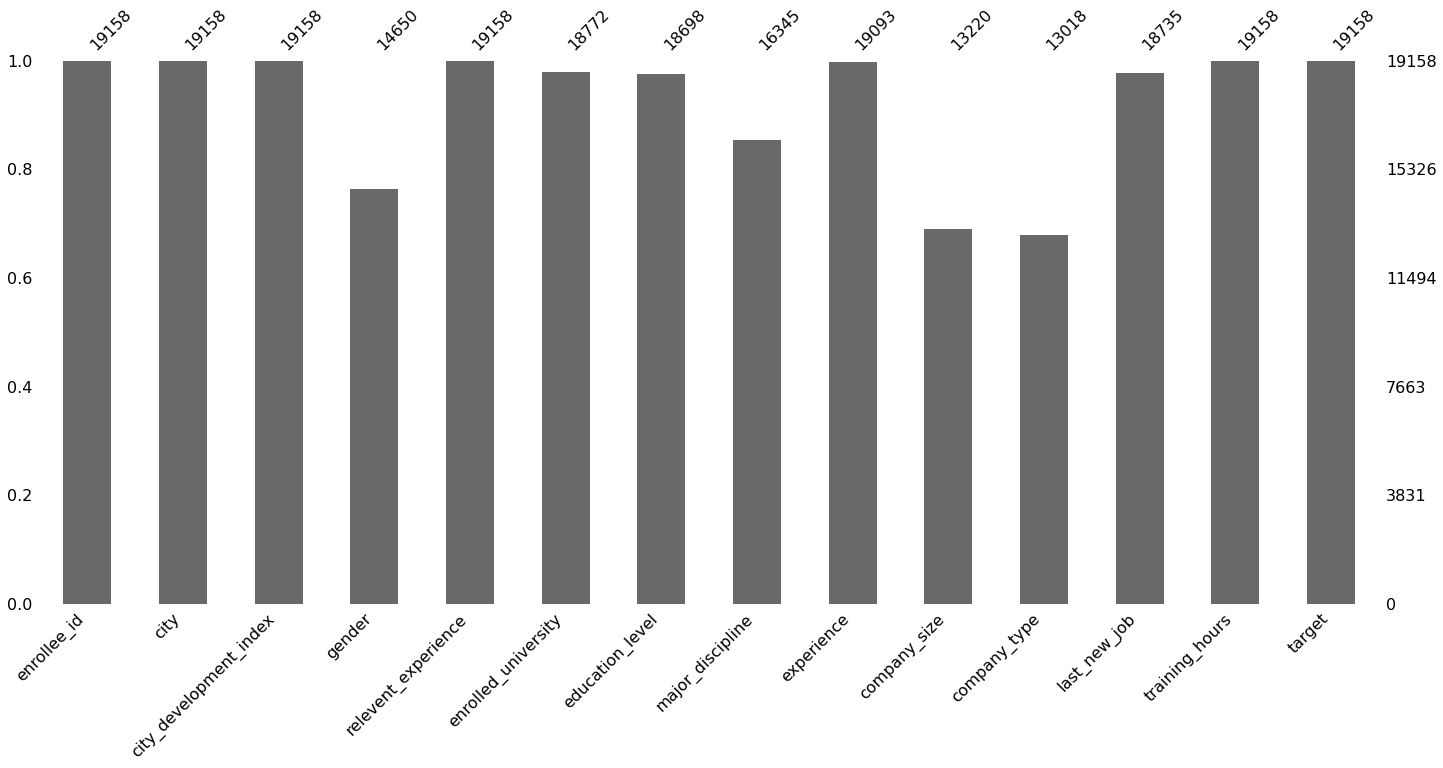

In [88]:
#msno.heatmap(train)
msno.bar(train)

In [89]:
#creating copy of train dataset so that we can make changes
emp_leave=train.copy()
display(emp_leave)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0


## EDA

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot(data, column):
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    perc = percentages.query(f'Column == "{column}"')['Percentage'].values
    sns.countplot(data=data, x=column, ax=ax[0])
    ax[1].pie(train[column].value_counts().values, labels=train[column].value_counts().index, autopct='%1.1f%%')
    fig.tight_layout()
    fig.suptitle(f'Column: \'{column}\'   -   Missing data: {perc[0]:.2f}%', fontsize=30)
    fig.subplots_adjust(top=0.88)
    fig.show()


<ipython-input-90-e6ff359e4cc6>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


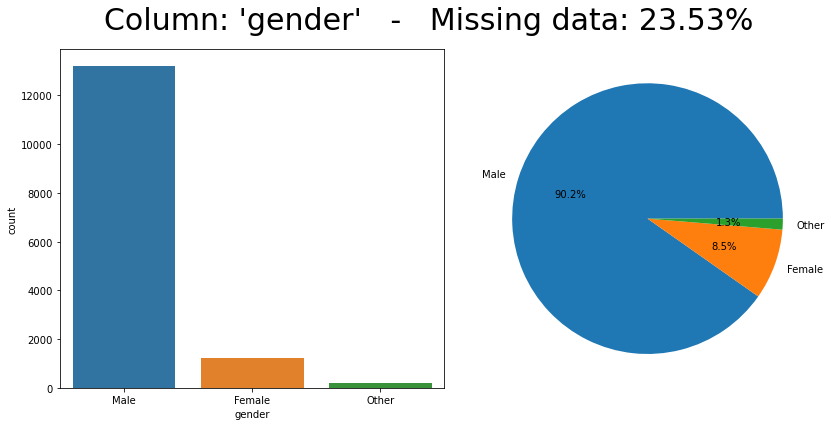

In [91]:
plot(train, 'gender')

#### Since gender column consists of high amount of null values we will assign global variable to it as Undefined, because if we fill null values with mode, still data will be imbalaced there will be high amout of male, and even of we replace all NAN with female the male will still be high.

In [92]:
#since nan values is really high we will treat it as a seperate category beacuse we cant drop nor fill with mean/mode, data will still be imbalaced
emp_leave['gender'].loc[emp_leave['gender'].isnull()==True]='Undefined'
print("Value count:\n", train.gender.value_counts())
print("Null Values:\n",train.gender .isna().sum())
print("\n After replacing NAN with Undefined:\n")
print("values count:\n",emp_leave.gender.value_counts())
print("Null values:\n",emp_leave.gender .isna().sum())


Value count:
 Male      13221
Female     1238
Other       191
Name: gender, dtype: int64
Null Values:
 4508

 After replacing NAN with Undefined:

values count:
 Male         13221
Undefined     4508
Female        1238
Other          191
Name: gender, dtype: int64
Null values:
 0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<ipython-input-90-e6ff359e4cc6>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


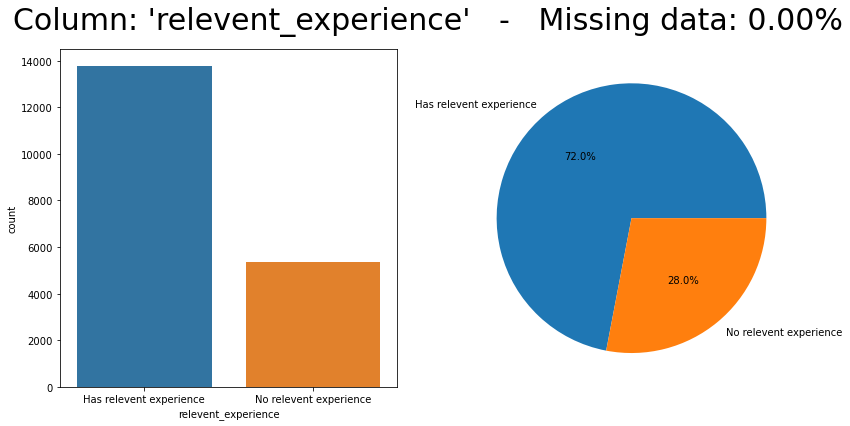

In [93]:
#relevent_experience
plot(train, 'relevent_experience')

#### As there are no null values we will keep this column as it is

<ipython-input-90-e6ff359e4cc6>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


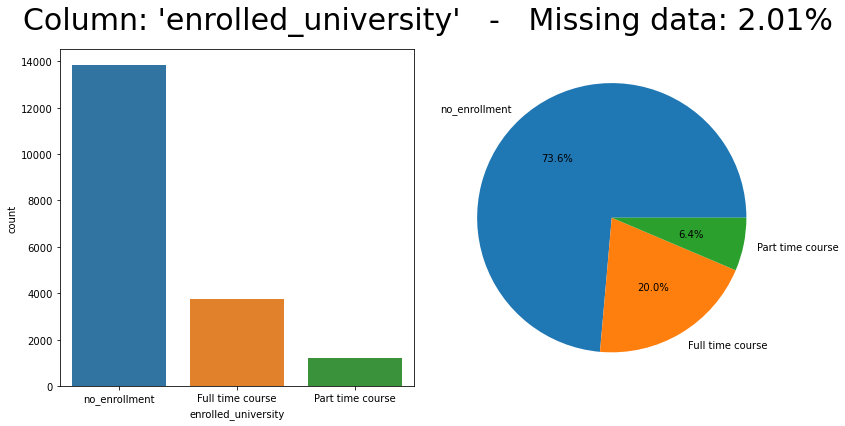

In [94]:
plot(train, 'enrolled_university')

In [95]:
#As there is only 2% of null values will replace null value with no_enrollment or we can say with mode
print("Train Data: Filling NAN values with mode")
emp_leave['enrolled_university'].fillna(emp_leave['enrolled_university'].mode()[0], inplace=True)
print("before:\n")
print("Value count:\n", train.enrolled_university.value_counts())
print("Null Values:\n",train.enrolled_university .isna().sum())
print("\n After data imputation on enrolled_university column:\n")
print("values count:\n",emp_leave.enrolled_university.value_counts())
print("Null values:\n",emp_leave.enrolled_university .isna().sum())


Train Data: Filling NAN values with mode
before:

Value count:
 no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
Null Values:
 386

 After data imputation on enrolled_university column:

values count:
 no_enrollment       14203
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64
Null values:
 0


<ipython-input-90-e6ff359e4cc6>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


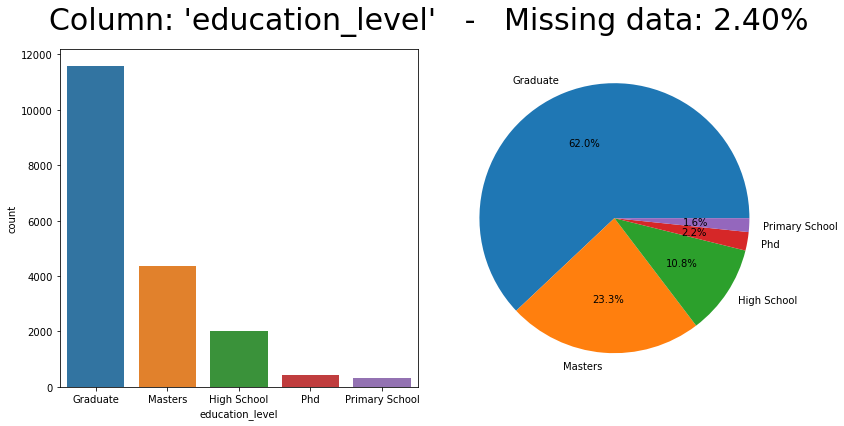

In [96]:
plot(train, 'education_level')

In [97]:
print("Train Data: Filling NAN values with mode")
emp_leave['education_level'].fillna(emp_leave['education_level'].mode()[0], inplace=True)
print("before:\n")
print("Value count:\n", train.education_level.value_counts())
print("Null Values:\n",train.education_level .isna().sum())
print("\n After data imputation on enrolled_university column:\n")
print("values count:\n",emp_leave.education_level.value_counts())
print("Null values:\n",emp_leave.education_level .isna().sum())


Train Data: Filling NAN values with mode
before:

Value count:
 Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64
Null Values:
 460

 After data imputation on enrolled_university column:

values count:
 Graduate          12058
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64
Null values:
 0


<ipython-input-90-e6ff359e4cc6>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


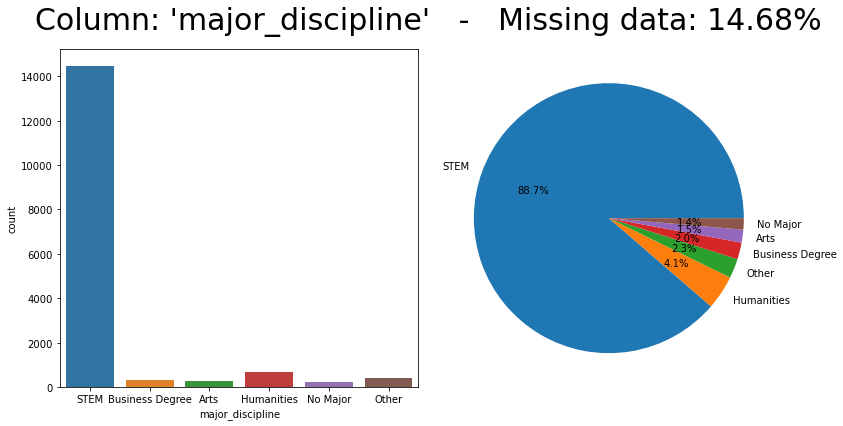

In [98]:
plot(train, 'major_discipline')

In [99]:
print("Train Data: Filling NAN values with mode\n")
emp_leave['major_discipline'].fillna(emp_leave['major_discipline'].mode()[0], inplace=True)
print("before:\n")
print("Value count:\n", train.major_discipline.value_counts())
print("Null Values:\n",train.major_discipline .isna().sum())
print("\n After data imputation on enrolled_university column:\n")
print("values count:\n",emp_leave.major_discipline.value_counts())
print("Null values:\n",emp_leave.major_discipline .isna().sum())



Train Data: Filling NAN values with mode

before:

Value count:
 STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64
Null Values:
 2813

 After data imputation on enrolled_university column:

values count:
 STEM               17305
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64
Null values:
 0


<ipython-input-90-e6ff359e4cc6>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


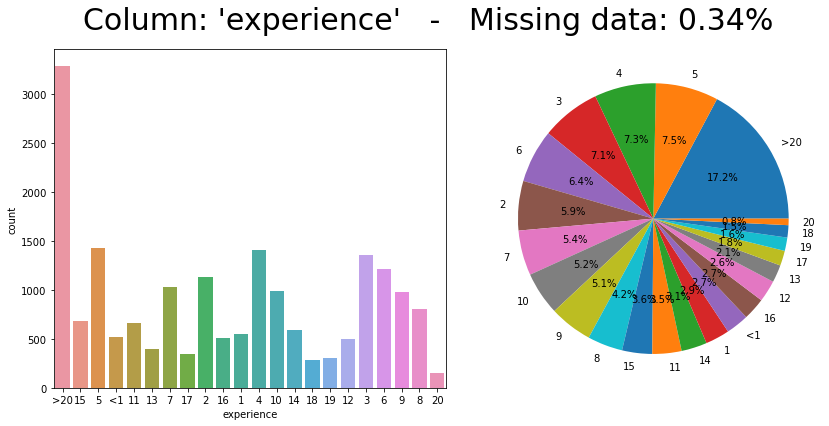

In [100]:
plot(train, 'experience')

In [101]:
print("Train Data: since experince column has just 0.34% missing values will drop them\n")
print("Values count:\n",emp_leave['experience'].value_counts().sum())
print("Null values:\n",emp_leave['experience'].isna().sum())
emp_leave.dropna(subset=['experience'], inplace=True)
print("***********After Dropping Null values and Replacing special chars(like >,+) with numbers************")
emp_leave.experience.replace('>20','21',inplace=True) 
emp_leave.experience.replace('<1','0',inplace=True)
#changing dtype of experince
emp_leave['experience'] = emp_leave['experience'].astype(int)
print("values count:\n",emp_leave.experience.value_counts())
print("Null values:\n",emp_leave.experience .isna().sum())



Train Data: since experince column has just 0.34% missing values will drop them

Values count:
 19093
Null values:
 65
***********After Dropping Null values and Replacing special chars(like >,+) with numbers************
values count:
 21    3286
5     1430
4     1403
3     1354
6     1216
2     1127
7     1028
10     985
9      980
8      802
15     686
11     664
14     586
1      549
0      522
16     508
12     494
13     399
17     342
19     304
18     280
20     148
Name: experience, dtype: int64
Null values:
 0


<ipython-input-90-e6ff359e4cc6>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


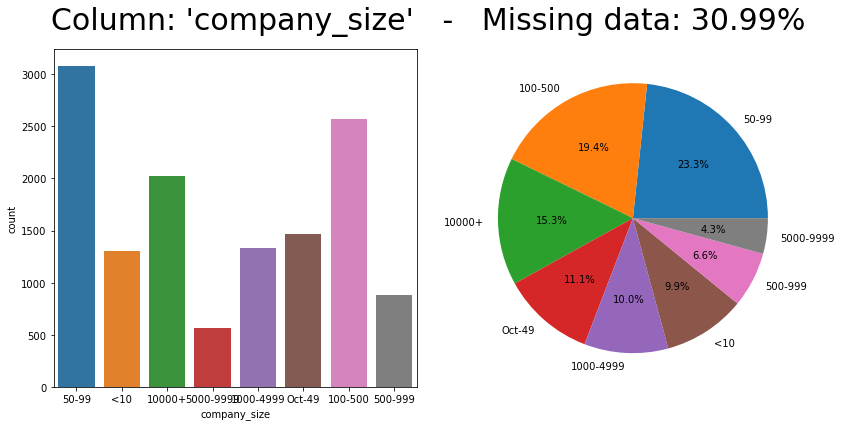

In [102]:
plot(train, 'company_size')

In [103]:
print("Train Data: Filling NAN values with mode\n")
emp_leave['company_size'].fillna(emp_leave['company_size'].mode()[0], inplace=True)
print("before:\n")
print("Value count:\n", train.company_size.value_counts())
print("Null Values:\n",train.company_size .isna().sum())
print("\n After data imputation on company size making categories clean:\n")
emp_leave.company_size.replace('Oct-49','10-49',inplace=True) 
emp_leave.company_size.replace('<10','0-10',inplace=True)
print("values count:\n",emp_leave.company_size.value_counts())
print("Null values:\n",emp_leave.company_size .isna().sum())




Train Data: Filling NAN values with mode

before:

Value count:
 50-99        3083
100-500      2571
10000+       2019
Oct-49       1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64
Null Values:
 5938

 After data imputation on company size making categories clean:

values count:
 50-99        8993
100-500      2563
10000+       2011
10-49        1466
1000-4999    1323
0-10         1304
500-999       874
5000-9999     559
Name: company_size, dtype: int64
Null values:
 0


<ipython-input-90-e6ff359e4cc6>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


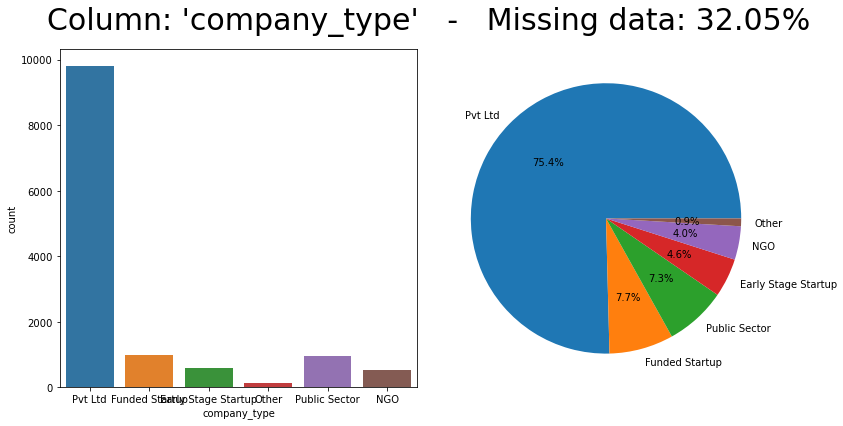

In [104]:
plot(train, 'company_type')

In [105]:
print("Train Data: Filling NAN values with mode\n")
emp_leave['company_type'].fillna(emp_leave['company_type'].mode()[0], inplace=True)
print("before:\n")
print("Value count:\n", train.company_type.value_counts())
print("Null Values:\n",train.company_type .isna().sum())
print("\n After data imputation on enrolled_university column:\n")
print("values count:\n",emp_leave.company_type.value_counts())
print("Null values:\n",emp_leave.company_type .isna().sum())


Train Data: Filling NAN values with mode

before:

Value count:
 Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64
Null Values:
 6140

 After data imputation on enrolled_university column:

values count:
 Pvt Ltd                15900
Funded Startup           999
Public Sector            953
Early Stage Startup      601
NGO                      519
Other                    121
Name: company_type, dtype: int64
Null values:
 0


<ipython-input-90-e6ff359e4cc6>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


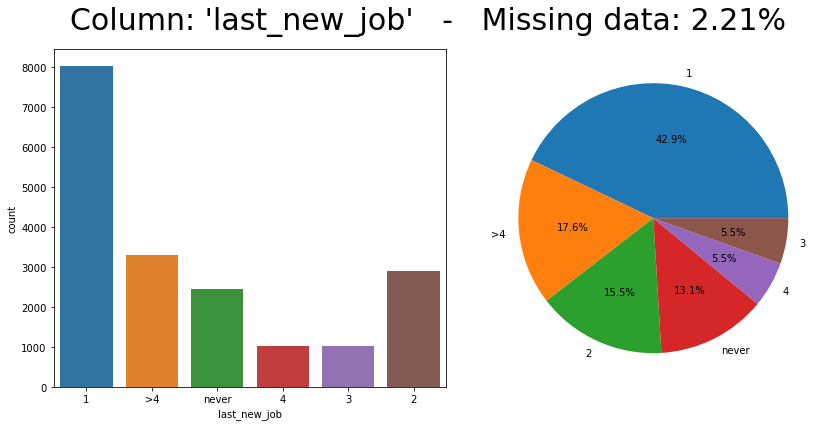

In [106]:
plot(train, 'last_new_job')

In [107]:
print("Train Data: Filling NAN values with mode\n")
emp_leave['last_new_job'].fillna(emp_leave['last_new_job'].mode()[0], inplace=True)
print("before:\n")
print("Value count:\n", train.last_new_job.value_counts())
print("Null Values:\n",train.last_new_job .isna().sum())
print("\n After data imputation on last_new_job column and making categories proper:\n")
emp_leave.last_new_job.replace('>4','5',inplace=True)
emp_leave.last_new_job.replace('never','0',inplace=True)
#changing dtypes
emp_leave['last_new_job'] = emp_leave['last_new_job'].astype(int)
print("values count:\n",emp_leave.last_new_job.value_counts())
print("Null values:\n",emp_leave.last_new_job .isna().sum())


Train Data: Filling NAN values with mode

before:

Value count:
 1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64
Null Values:
 423

 After data imputation on last_new_job column and making categories proper:

values count:
 1    8418
5    3283
2    2897
0    2444
4    1028
3    1023
Name: last_new_job, dtype: int64
Null values:
 0


In [108]:
print("**********The data is clean and ready for modeling**********\n")
print("There are no Null Values:\n", emp_leave.isna().sum())
print("Structure :\n", emp_leave.shape)
print("----------This is cleaned dataset----------")

display(emp_leave.head())


**********The data is clean and ready for modeling**********

There are no Null Values:
 enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64
Structure :
 (19093, 14)
----------This is cleaned dataset----------


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0
2,11561,city_21,0.624,Undefined,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,0,83,0
3,33241,city_115,0.789,Undefined,No relevent experience,no_enrollment,Graduate,Business Degree,0,50-99,Pvt Ltd,0,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0


## Dropping Columns

In [109]:
emp_leave.drop(['enrollee_id'], axis = 1, inplace=True)

In [110]:
emp_leave.drop(['city'], axis = 1, inplace=True)

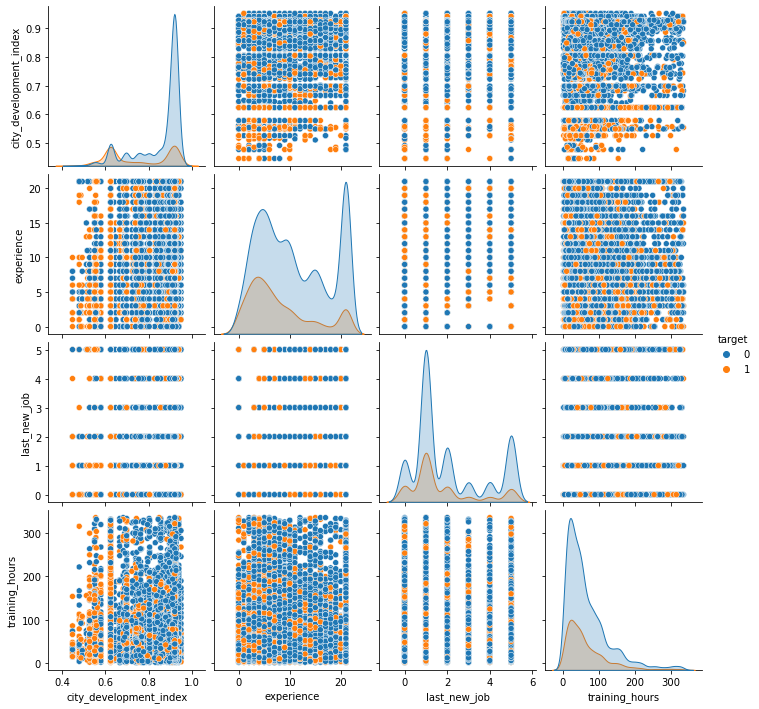

In [111]:
sns.pairplot(emp_leave, hue="target")

In [112]:
emp_leave

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,1,36,1
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,5,47,0
2,0.624,Undefined,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,0,83,0
3,0.789,Undefined,No relevent experience,no_enrollment,Graduate,Business Degree,0,50-99,Pvt Ltd,0,52,1
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,50-99,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,50-99,Pvt Ltd,1,42,1
19154,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,4,52,1
19155,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,50-99,Pvt Ltd,4,44,0
19156,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,0,500-999,Pvt Ltd,2,97,0


In [113]:
emp_leave['education_level'].value_counts()

Graduate          12016
Masters            4346
High School        2013
Phd                 411
Primary School      307
Name: education_level, dtype: int64

## Feature Engineering

In [114]:
#Odinal encoding
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
def ord_encode(df, col_name, cats):
    df[col_name]= OrdinalEncoder(categories= [cats], dtype= int).fit_transform(emp_leave[col_name].values.reshape(-1,1))
    #test[col_name]= OrdinalEncoder(categories= [cats], dtype= int).fit_transform(new_df[col_name].values.reshape(-1,1))
    return df

In [115]:
emp_leave= ord_encode(emp_leave, 'relevent_experience', ['No relevent experience','Has relevent experience'])

In [116]:
emp_leave= ord_encode(emp_leave, 'enrolled_university', ['no_enrollment','Part time course', 'Full time course'])

In [117]:
emp_leave= ord_encode(emp_leave, 'education_level', ['Primary School','High School', 'Graduate', 'Masters', 'Phd'])

In [118]:
company_size_map = {
    '0-10' : 0,
    '10-49' : 1,
    '50-99' : 2,
    '100-500' : 3,
    '500-999' : 4,
    '1000-4999' : 5,
    '5000-9999' : 6,
    '10000+' : 7
}

In [119]:
emp_leave.loc[:,'company_size'] = emp_leave['company_size'].map(company_size_map)

In [120]:
emp_leave

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,1,0,2,STEM,21,2,Pvt Ltd,1,36,1
1,0.776,Male,0,0,2,STEM,15,2,Pvt Ltd,5,47,0
2,0.624,Undefined,0,2,2,STEM,5,2,Pvt Ltd,0,83,0
3,0.789,Undefined,0,0,2,Business Degree,0,2,Pvt Ltd,0,52,1
4,0.767,Male,1,0,3,STEM,21,2,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,Male,0,0,2,Humanities,14,2,Pvt Ltd,1,42,1
19154,0.920,Male,1,0,2,STEM,14,2,Pvt Ltd,4,52,1
19155,0.920,Male,1,0,2,STEM,21,2,Pvt Ltd,4,44,0
19156,0.802,Male,1,0,1,STEM,0,4,Pvt Ltd,2,97,0


In [121]:
#checking how many columns will get created after one hot encoding these variables
emp_leave = pd.get_dummies(emp_leave,drop_first=True)

In [122]:
emp_leave

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,gender_Male,...,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.920,1,0,2,21,2,1,36,1,1,...,0,0,0,0,1,0,0,0,0,1
1,0.776,0,0,2,15,2,5,47,0,1,...,0,0,0,0,1,0,0,0,0,1
2,0.624,0,2,2,5,2,0,83,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.789,0,0,2,0,2,0,52,1,0,...,1,0,0,0,0,0,0,0,0,1
4,0.767,1,0,3,21,2,4,8,0,1,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,0,0,2,14,2,1,42,1,1,...,0,1,0,0,0,0,0,0,0,1
19154,0.920,1,0,2,14,2,4,52,1,1,...,0,0,0,0,1,0,0,0,0,1
19155,0.920,1,0,2,21,2,4,44,0,1,...,0,0,0,0,1,0,0,0,0,1
19156,0.802,1,0,1,0,4,2,97,0,1,...,0,0,0,0,1,0,0,0,0,1


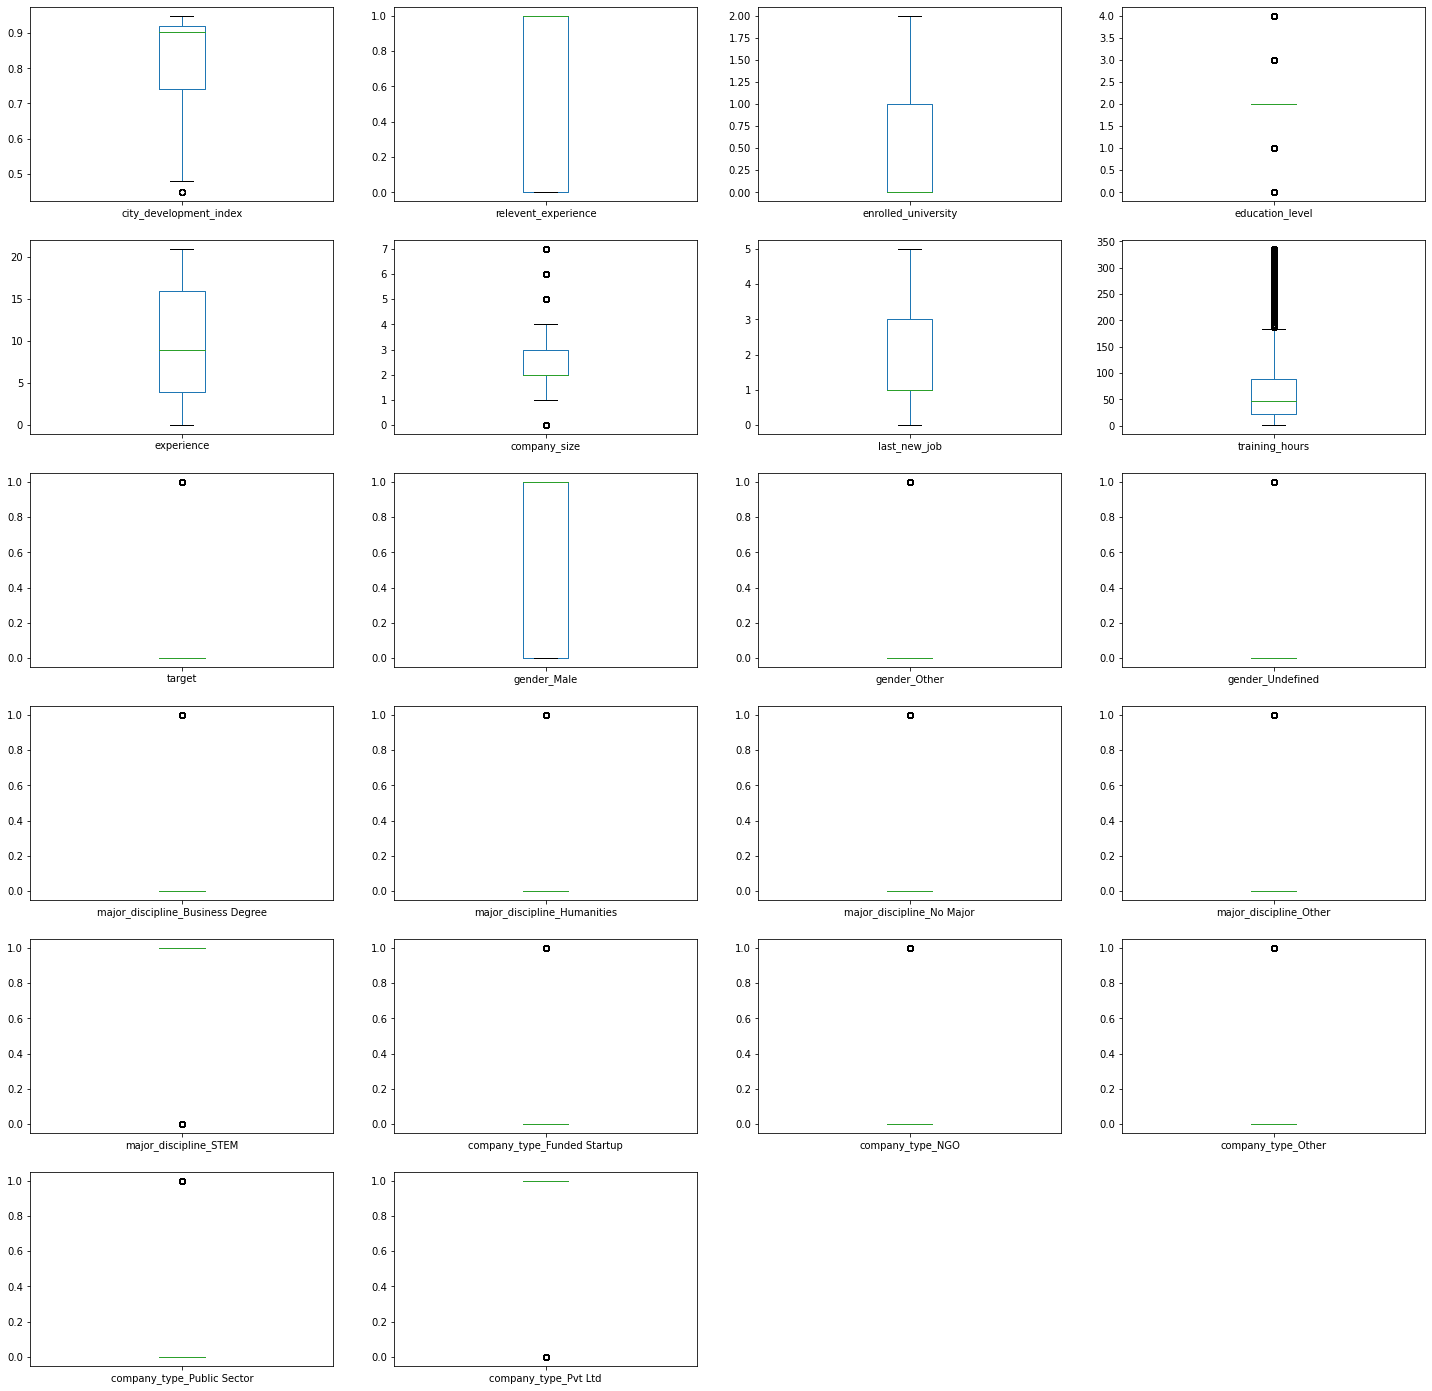

In [124]:
emp_leave.plot(kind='box', figsize=(25,25), layout=(6,4), sharex=False, subplots=True);

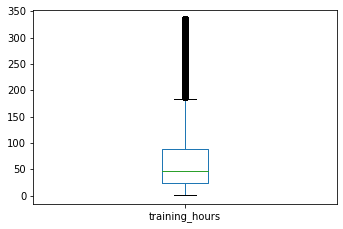

In [125]:
emp_leave['training_hours'].plot(kind='box', figsize=(25,25), layout=(6,4), sharex=False, subplots=True);

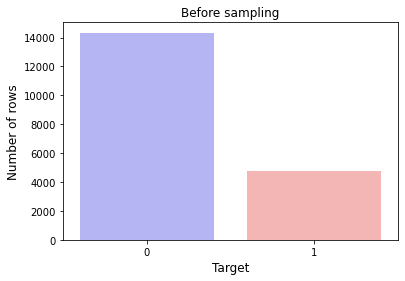

In [126]:
sns.countplot(x='target', data=emp_leave, palette='bwr')
plt.ylabel('Number of rows', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.title('Before sampling')
plt.show()

In [127]:
from imblearn.over_sampling import SMOTE

In [128]:
X = emp_leave.drop("target",axis=1)   #Feature Matrix
y = emp_leave["target"]

#X_train,X_test,y_train,y_test = train_test_split(train_data,y,test_size=0.2)

In [129]:
oversample = SMOTE()
smote = SMOTE(random_state = 0)
X_smote, y_smote = smote.fit_resample(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


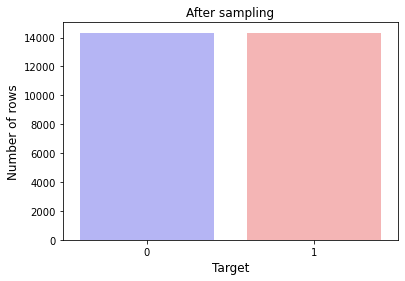

In [130]:
plt.figure(figsize=(6, 4))
sns.barplot(y_smote.value_counts().index.astype(int),
            y_smote.value_counts().values, palette='bwr')
plt.ylabel('Number of rows', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.title('After sampling')
plt.show()

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_smote,
    y_smote,
    test_size=0.2,
    random_state=0)

X_train.shape, X_test.shape

((22942, 21), (5736, 21))

## MODELS

In [139]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### DecisionTreeClassifier

In [142]:
# Tuning the tree size parameter 'max_depth' and implementing cross-validation using Grid Search
classifier = tree.DecisionTreeClassifier(criterion = 'entropy')
grid_param = {'max_depth': [2,3,4,5,10,15,20,25,30,35]}

gd_sr = GridSearchCV(estimator=classifier, param_grid=grid_param, cv=5)

"""
In the above GridSearchCV(), scoring parameter should be set as follows:
scoring = 'accuracy' when you want to maximize prediction accuracy
scoring = 'recall' when you want to minimize false negatives
scoring = 'precision' when you want to minimize false positives
scoring = 'f1' when you want to balance false positives and false negatives (place equal emphasis on minimizing both)
"""

gd_sr.fit(X_train, y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)

{'max_depth': 10}
0.7663235670454898


In [157]:
# Building Classification Decision Tree Model
from sklearn import tree
dtree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
dtree.fit(X_train, y_train)


dtree_pred = dtree.predict(X_test)

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      2880
           1       0.74      0.79      0.76      2856

    accuracy                           0.76      5736
   macro avg       0.76      0.76      0.76      5736
weighted avg       0.76      0.76      0.76      5736



<AxesSubplot:>

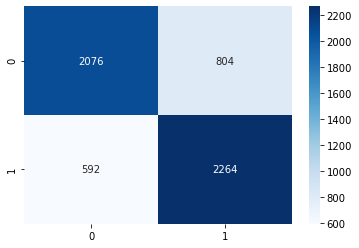

In [159]:
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix_dtree1 = confusion_matrix(y_test, dtree_pred)
#sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
print(classification_report(y_test, dtree_pred))

sns.heatmap(cf_matrix_dtree1, annot = True, cmap='Blues', fmt='g')

In [150]:
dtree_accuracy_score=accuracy_score(y_test,dtree_pred)

dtree_train_score=dtree.score(X_train,y_train)

dtree_f1_score=f1_score(y_test,dtree_pred)

dtree_recall_score=recall_score(y_test,dtree_pred)

dtree_precision_score=precision_score(y_test,dtree_pred)

In [151]:
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(criterion='entropy', max_features='auto', random_state=1)
grid_param = {'n_estimators': [200, 250, 300, 350, 400, 450]}

gd_sr = GridSearchCV(estimator=rfc, param_grid=grid_param, cv=5)

"""
In the above GridSearchCV(), scoring parameter should be set as follows:
scoring = 'accuracy' when you want to maximize prediction accuracy
scoring = 'recall' when you want to minimize false negatives
scoring = 'precision' when you want to minimize false positives
scoring = 'f1' when you want to balance false positives and false negatives (place equal emphasis on minimizing both)
"""

gd_sr.fit(X_train, y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)



{'n_estimators': 300}
0.8082123051921097


In [152]:
# Building random forest using the tuned parameter
rfc = RandomForestClassifier(n_estimators=300, criterion='entropy', max_features='auto', random_state=1)
rfc.fit(X_train,y_train)

rfc_pred = rfc.predict(X_test)



              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2880
           1       0.80      0.82      0.81      2856

    accuracy                           0.81      5736
   macro avg       0.81      0.81      0.81      5736
weighted avg       0.81      0.81      0.81      5736



<AxesSubplot:>

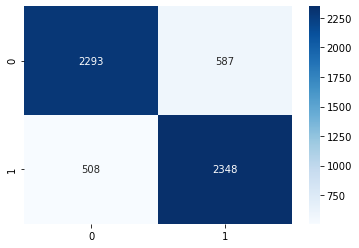

In [154]:
from sklearn.metrics import confusion_matrix, classification_report
cf_matrix_rfc = confusion_matrix(y_test, rfc_pred)
#sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
print(classification_report(y_test, rfc_pred))

sns.heatmap(cf_matrix_rfc, annot = True, cmap='Blues', fmt='g')

In [153]:
rfc_accuracy_score=accuracy_score(y_test,rfc_pred)

rfc_train_score=rfc.score(X_train,y_train)

rfc_f1_score=f1_score(y_test,rfc_pred)

rfc_recall_score=recall_score(y_test,rfc_pred)

rfc_precision_score=precision_score(y_test,rfc_pred)

In [154]:
results=pd.DataFrame({
    "Algorithm":["DecisionTreeClassifier", "RandomForestClassifier"],
    "Accuracy":[dtree_accuracy_score,rfc_accuracy_score],
    "Train Score":[dtree_train_score,rfc_train_score],
    "f1_Score":[dtree_f1_score,rfc_f1_score],
     "Recall_Score":[dtree_recall_score,rfc_recall_score],
      "Precision_Score":[dtree_precision_score,rfc_precision_score]})

results.sort_values(ascending=False,by="Accuracy")

,Algorithm,Accuracy,Train Score,f1_Score,Recall_Score,Precision_Score
1,RandomForestClassifier,0.809100,0.998213,0.810913,0.822129,0.800000
0,DecisionTreeClassifier,0.757322,0.807035,0.765182,0.794118,0.738281


Text(0.5, 1.0, 'ROC & AUC for RandomForestClassifier')

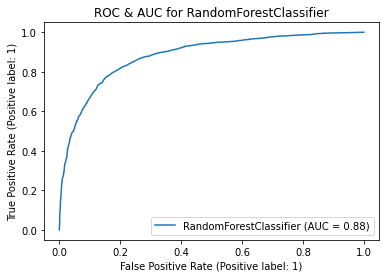

In [156]:
from sklearn import metrics
metrics.plot_roc_curve(rfc, X_test, y_test)
plt.title(label = 'ROC & AUC for RandomForestClassifier')

Text(0.5, 1.0, 'ROC & AUC for DecisionTreeClassifier')

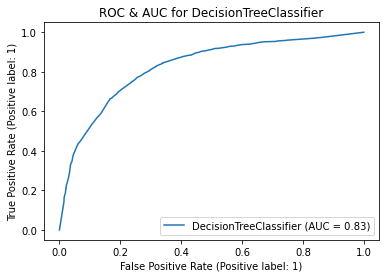

In [160]:
from sklearn import metrics
metrics.plot_roc_curve(dtree, X_test, y_test)
plt.title(label = 'ROC & AUC for DecisionTreeClassifier')